## Plot KDE Max Eigenvalues density

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1" # Set GPU Index to use"

In [36]:
ternary_neg

[-0.019512297585606575]

/home/ms/anaconda3/envs/deep/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

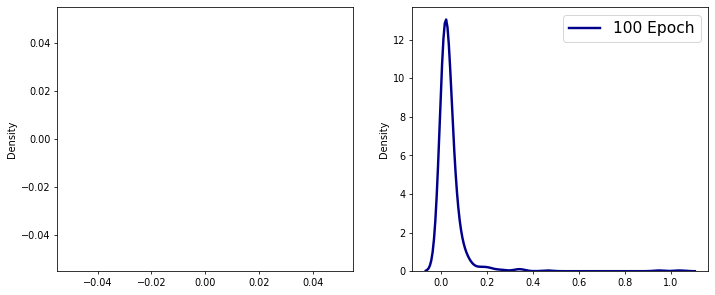

In [44]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

task = "rte"

# STS-B
if task == "sts-b":
    ternary_eigens_init =torch.load("hessian_value_pts/sts-b_ternary_init.pt")
    sarq_eigens_init = torch.load("hessian_value_pts/sts-b_sarq_init.pt")
    ternary_eigens = torch.load("hessian_value_pts/sts-b_ternary_result.pt")
    sarq_eigens = torch.load("hessian_value_pts/sts-b_sarq_result.pt")

# RTE
if task == "rte":
    # ternary_eigens_init = torch.load("hessian_value_pts/rte_nomal_init.pt")
    # sarq_eigens_init = torch.load("hessian_value_pts/rte_sarq_init.pt")
    ternary_eigens = torch.load("hessian_value_pts/rte_gt_100_2.pt.pt")
    sarq_eigens = torch.load("hessian_value_pts/rte_gt_3.pt")

# CoLA
if task == "cola":
    # sarq_eigens_init =torch.load("hessian_value_pts/cola_sarq_init.pt")
    # ternary_eigens_init =torch.load("hessian_value_pts/cola_ternary_init.pt")
    sarq_eigens =torch.load("hessian_value_pts/cola_m_3_gt.pt")
    ternary_eigens =torch.load("hessian_value_pts/cola_gt_100.pt")

# MRPC
if task == "mrpc":
    ternary_eigens_init =torch.load("hessian_value_pts/mrpc_ternary_init.pt")
    sarq_eigens_init = torch.load("hessian_value_pts/mrpc_sarq_init.pt")
    # ternary_eigens = torch.load("hessian_value_pts/mrpc_ternary_result.pt")
    # sarq_eigens = torch.load("hessian_value_pts/mrpc_sarq_result.pt")

ternary_pos = []
ternary_neg = []
for eigen in ternary_eigens:
    if eigen > 0:
        ternary_pos.append(eigen)
    else:
        ternary_neg.append(eigen)
        
sarq_pos = []
sarq_neg = []
for eigen in sarq_eigens:
    if eigen > 0:
        sarq_pos.append(eigen)
    else:
        sarq_neg.append(eigen)

# ternary_init_pos = []
# ternary_init_neg = []
# for eigen in ternary_eigens_init:
#     if eigen > 0:
#         ternary_init_pos.append(eigen)
#     else:
#         ternary_init_neg.append(eigen)
        
# sarq_init_pos = []
# sarq_init_neg = []
# for eigen in sarq_eigens_init:
#     if eigen > 0:
#         sarq_init_pos.append(eigen)
#     else:
#         sarq_init_neg.append(eigen)
        

fs = 10
lw = 2.5

# fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=70)
# sns.kdeplot(sarq_init_pos, color="tab:blue", label="sarq_init", linewidth=lw, ax=axes[1])
# sns.kdeplot(ternary_init_pos, color="darkblue", label="ternary_init", linewidth=lw, ax=axes[1])
# plt.xticks(fontsize=fs)
# plt.yticks(fontsize=fs)
# plt.ylim(0, 0.025)
# plt.savefig('init_pos.png', format='png', dpi=100)

# sns.kdeplot(sarq_init_neg, color="tab:blue", label="sarq_init", linewidth=lw, ax=axes[0])
# sns.kdeplot(ternary_init_neg, color="darkblue", label="ternary_init", linewidth=lw, ax=axes[0])
# axes[1].legend(fontsize = fs+6, loc=1)
# plt.xticks(fontsize=fs)
# plt.yticks(fontsize=fs)
# plt.ylim(0, 0.025)
# tc_hessian_value_ptss
# plt.savefig('init_neg.png', format='png', dpi=100)

fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=70)
# sns.kdeplot(ternary_init_pos, color="gray", label="1 Epoch", linewidth=lw, ax=axes[1])
# sns.kdeplot(sarq_pos, color="tab:blue", label="3 Epoch", linewidth=lw, ax=axes[1])
sns.kdeplot(ternary_pos, color="darkblue", label="100 Epoch", linewidth=lw, ax=axes[1])
plt.legend(fontsize = fs+6, loc=1)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

# sns.kdeplot(ternary_init_neg, color="gray", label="1 Epoch", linewidth=lw, ax=axes[0])
# sns.kdeplot(sarq_neg, color="tab:blue", label="3 Epoch", linewidth=lw, ax=axes[0])
sns.kdeplot(ternary_neg, color="darkblue", label="100 Epoch", linewidth=lw, ax=axes[0])
plt.legend(fontsize = fs+6)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

## Gradient Norm Graph


(0.03162277660168379, 100)

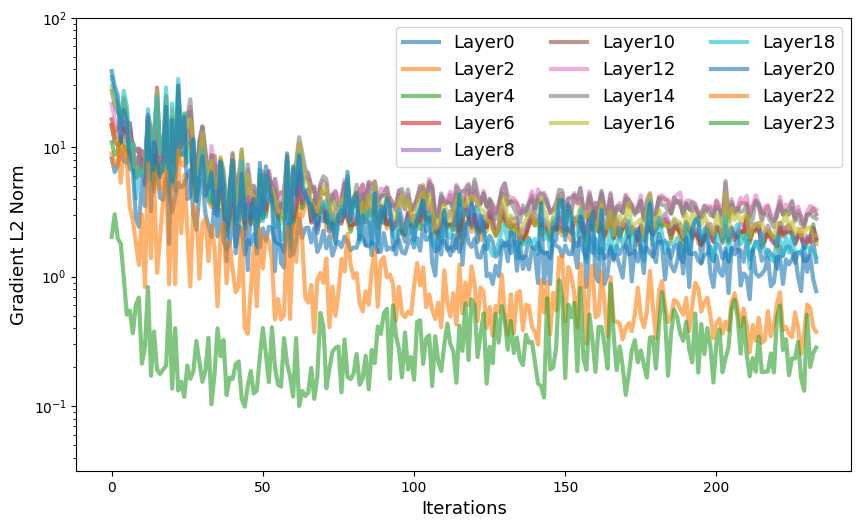

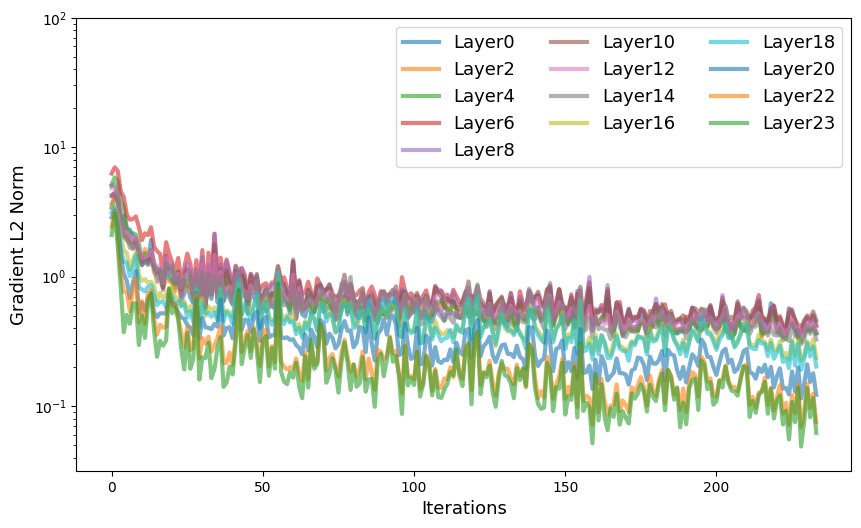

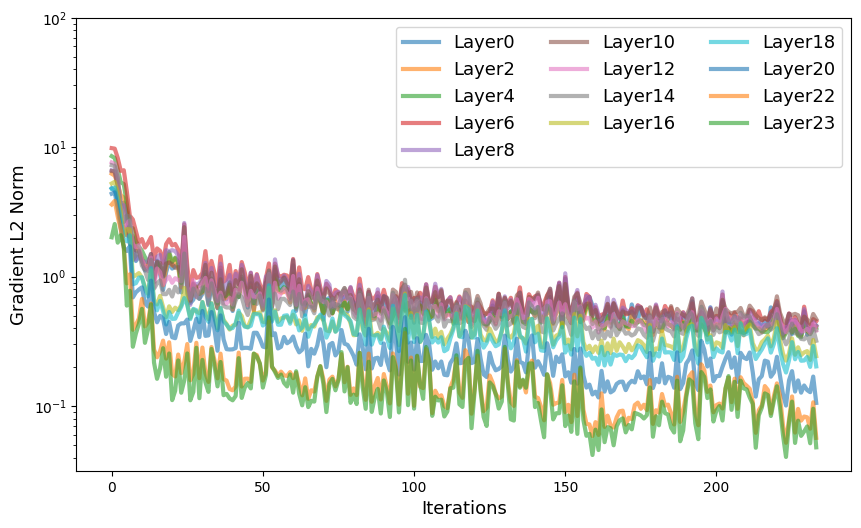

In [63]:
ternary_grad = torch.load("rte_large_ternary_grad_dict.pt")
grad_2SB = torch.load("rte_large_2SB_grad_dict.pt")
grad_1SB = torch.load("rte_large_1SB_grad_dict.pt.pt")

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
layer_list = list(range(0, 24, 2))
# layer_list = list(range(0, 24))
layer_list.append(23)
layer = layer_list
# earlier_layer = layer_list[0:3]
# middle_layer = layer_list[10:13]
# deeper_layer = layer_list[20:]
# layer = deeper_layer
# layer = earlier_layer + middle_layer + deeper_layer

type="value"
step_num = len(ternary_grad[f"ffn_2_L{0}"])
for l in layer:
    ax.plot(range(step_num), ternary_grad[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.ylim((pow(10,-1.5),pow(10,2)))
plt.legend(fontsize=13, loc=1, ncol=3)

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
for l in layer:
    ax.plot(range(step_num), grad_1SB[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.legend(fontsize=13, loc=1, ncol=3)
plt.ylim((pow(10,-1.5),pow(10,2)))
# plt.legend(fontsize=15)
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
for l in layer:
    ax.plot(range(step_num), grad_2SB[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.legend(fontsize=13, loc=1, ncol=3)
plt.ylim((pow(10,-1.5),pow(10,2)))
# plt.legend(fontsize=15)

(0.03162277660168379, 100)

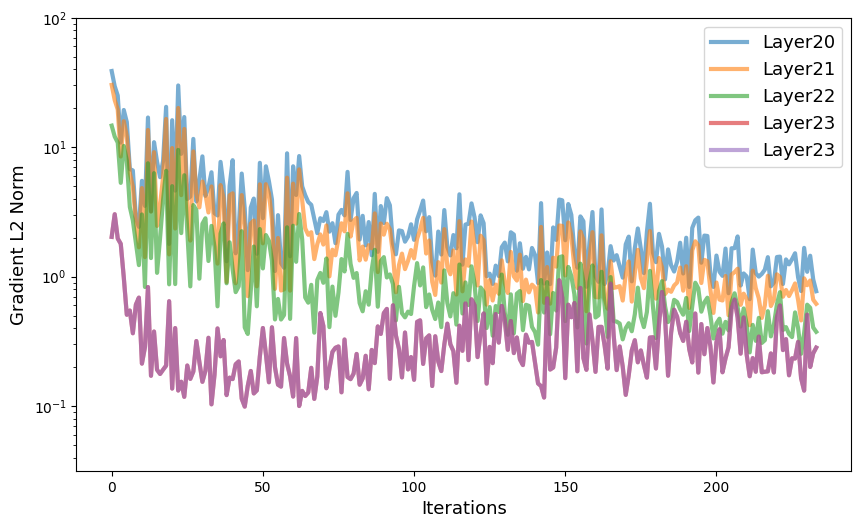

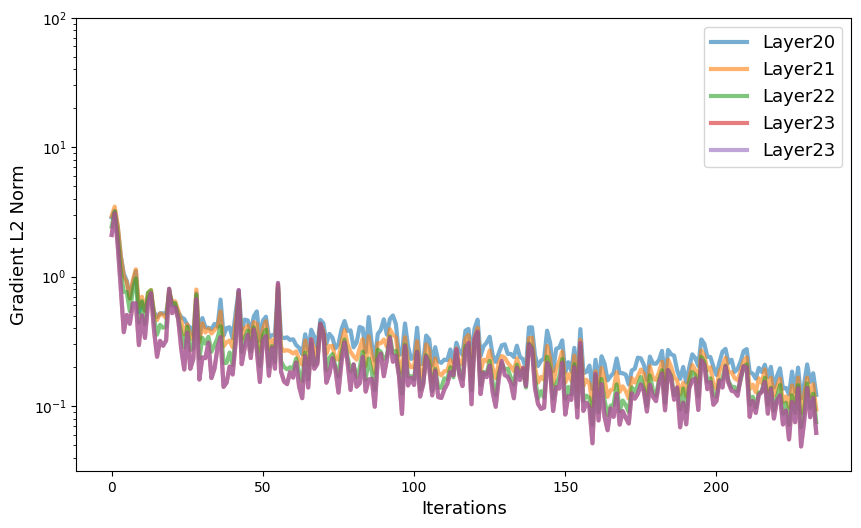

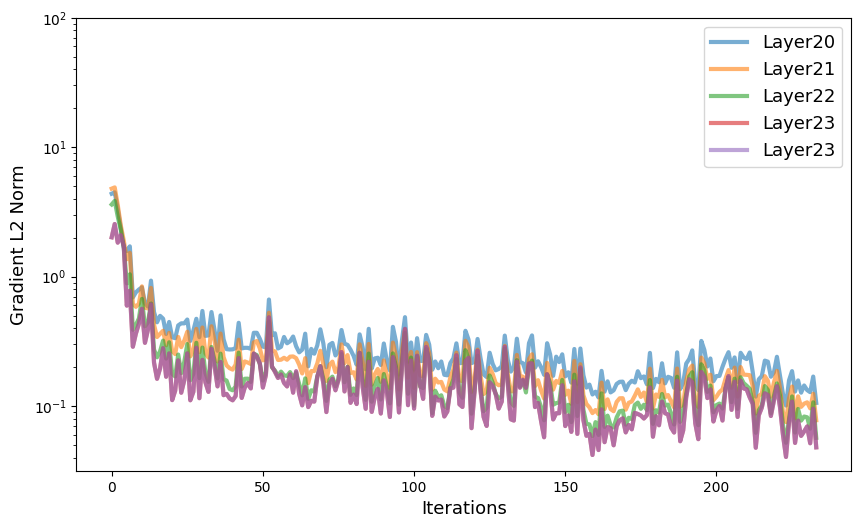

In [64]:
ternary_grad = torch.load("rte_large_ternary_grad_dict.pt")
grad_2SB = torch.load("rte_large_2SB_grad_dict.pt")
grad_1SB = torch.load("rte_large_1SB_grad_dict.pt.pt")

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
# layer_list = list(range(0, 24, 2))
layer_list = list(range(0, 24))
layer_list.append(23)
# layer = layer_list
# earlier_layer = layer_list[0:3]
# middle_layer = layer_list[10:13]
deeper_layer = layer_list[20:]
layer = deeper_layer
# layer = earlier_layer + middle_layer + deeper_layer

step_num = len(ternary_grad[f"ffn_2_L{0}"])
for l in layer:
    ax.plot(range(step_num), ternary_grad[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.ylim((pow(10,-1.5),pow(10,2)))
plt.legend(fontsize=13, loc=1, ncol=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
for l in layer:
    ax.plot(range(step_num), grad_1SB[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.legend(fontsize=13, loc=1, ncol=1)
plt.ylim((pow(10,-1.5),pow(10,2)))
# plt.legend(fontsize=15)
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
for l in layer:
    ax.plot(range(step_num), grad_2SB[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.legend(fontsize=13, loc=1, ncol=1)
plt.ylim((pow(10,-1.5),pow(10,2)))
# plt.legend(fontsize=15)